In [0]:
import numpy as np
import pandas as pd
import re
import string

def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return nopunc

#read file
def readFile(fileName):
    my_file = pd.read_csv( '../content/'+fileName , 
                        sep = ',')
    return my_file

# read datafile
data_file = readFile('yelp_2k.csv')

data_file['text'] = data_file['text'].map(text_process)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import string

X = data_file.text
y = data_file.stars
X = X.str.lower()

#X = X.tolist()
#X.apply(convert)
#X = X.str.lower()
#X = re.search(r"(?u)\b\w+\b",X)
#X = [re.search(r"(?u)\b\w+\b",a) for a in X]
#print(X)

bow_transformer = CountVectorizer().fit(X)
messages_bow = bow_transformer.transform(X)

len_bow = len(bow_transformer.vocabulary_)

In [0]:
print(len(bow_transformer.vocabulary_))
'''
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_rank = tfidf_transformer.transform(messages_bow)
'''

14215


'\nfrom sklearn.feature_extraction.text import TfidfTransformer\n\ntfidf_transformer = TfidfTransformer().fit(messages_bow)\ntfidf_rank = tfidf_transformer.transform(messages_bow)\n'

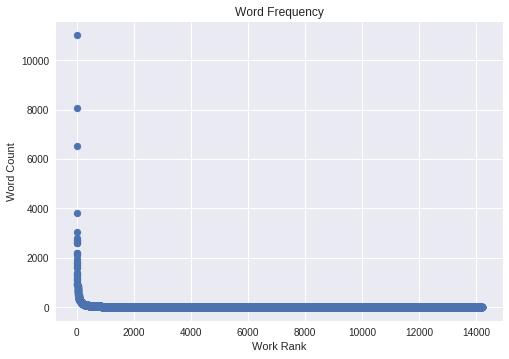

In [0]:
import matplotlib.pyplot as plt

allWords = X.str.cat(sep=' ')
allword_count = CountVectorizer().fit([allWords])
allWords_bow = allword_count.transform([allWords])

arr = [x for x in range(len_bow)]

plt.title("Word Frequency")
plt.ylabel("Word Count")
plt.xlabel("Work Rank")
plt.scatter(
  arr,
  list(reversed(np.sort(np.asarray(allWords_bow.toarray()[0]), -1)))
)
plt.show()
#allwords_tfidf_transformer = TfidfTransformer().fit(allWords_bow)
#allwords_tfidf_rank = allwords_tfidf_transformer.transform(allWords_bow)

#print(allword_count.get_feature_names())
#print(allword_count.vocabulary_)
#sorted_x = sorted(allword_count.vocabulary_.items(), key=lambda kv: kv[1],reverse = True)
#print(allword_count.vocabulary_)
#print(allWords_bow)
#sorted_x = sorted(allword_count.vocabulary_.values(), reverse = True)

#print(sorted_x)
#print(allWords_bow)

In [0]:
allwordsCounts = allWords_bow.toarray()[0]
wordToCount = {}
for x in allword_count.vocabulary_ :
  wordToCount[x] = allwordsCounts[allword_count.vocabulary_[x]]
  
print(wordToCount)
sorted_x = sorted(wordToCount.items(), key=lambda kv: kv[1], reverse = True)

stop_words = ['he', 'our', 'she', 'up', 'an', 'their', 
              'go', 'about', 'then', 'or', 'can', 'what', 
              'your', 'us', 'been', 'because', 'by', 
              'which', 'did', 'got']

max_threshold = 900
min_threshold = 3

for (a, b) in sorted_x:
  if b >= max_threshold:
    stop_words.append(a)
  elif b <= min_threshold:
    stop_words.append(a)
      

{'this': 2104, 'car': 248, 'wash': 31, 'sucks': 25, 'paid': 96, '40': 41, 'for': 2722, 'the': 11010, 'ultimate': 6, 'vip': 7, 'still': 231, 'had': 1384, 'dirt': 13, 'all': 841, 'over': 344, 'bumpers': 1, 'no': 670, 'vacuuming': 2, 'in': 2671, 'hatch': 1, 'sales': 47, 'people': 319, 'are': 1121, 'very': 721, 'pushy': 5, 'guy': 126, 'kept': 56, 'trying': 102, 'to': 6545, 'sell': 34, 'me': 1322, 'an': 711, 'oil': 49, 'change': 70, 'next': 199, 'was': 3816, 'so': 1226, 'about': 619, 'getting': 119, 'full': 109, 'detail': 24, '155': 3, 'my': 2599, 'is': 2603, 'brand': 28, 'new': 249, 'ridiculous': 34, 'worst': 157, 'service': 777, 'ever': 284, 'referred': 11, 'earnie': 2, 'by': 464, 'friends': 112, 'and': 8073, 'since': 173, 'then': 367, 'ive': 293, 'him': 199, 'many': 159, 'times': 168, 'beautiful': 60, 'tattoos': 2, 'speak': 33, 'themselves': 15, 'get': 774, 'complimented': 3, 'on': 1711, 'them': 608, 'time': 716, 'asked': 284, 'where': 185, 'got': 419, 'always': 271, 'say': 238, 'go': 61

In [0]:
def text_process_with_stopWords(mess):
  word_list = []
  for word in mess.split():
    if word.lower() not in stop_words:
      word_list.append(word.lower())
      
  return ' '.join(word_list)

allwords = data_file['text'].map(text_process_with_stopWords)
allwords = allwords.str.lower()

allWords_concatinated = allwords.str.cat(sep=' ')
vectorizer = CountVectorizer()
allword_count = vectorizer.fit([allWords_concatinated])
allWords_bow = allword_count.transform([allWords_concatinated])

4055


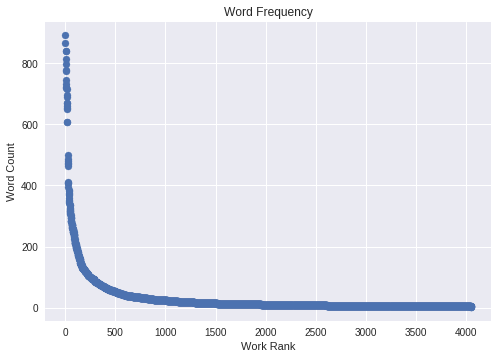

In [0]:
import matplotlib.pyplot as plt

len_bow = len(allword_count.vocabulary_)
print(len_bow)
arr = [x for x in range(len_bow)]

plt.title("Word Frequency")
plt.ylabel("Word Count")
plt.xlabel("Work Rank")
plt.scatter(
  arr,
  list(reversed(np.sort(np.asarray(allWords_bow.toarray()[0]), -1)))
  
)
plt.show()

In [0]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfTransformer

allword_count = vectorizer.fit(allwords.tolist())
allWords_bow = allword_count.transform(allwords.tolist())

tfidf_transformer = TfidfTransformer().fit(allWords_bow)
tfidf_rank = tfidf_transformer.transform(allWords_bow)

neighbors = NearestNeighbors(metric='cosine').fit(tfidf_rank)
bow_entry = allword_count.transform(['horrible customer service'])
qv = tfidf_transformer.transform(bow_entry)

five_neighbors_dist, five_neighbors_indices = neighbors.kneighbors(qv)

similar = pd.Series(five_neighbors_indices.flatten()).map(X.reset_index()['text'])
result = pd.DataFrame({'distance': five_neighbors_dist.flatten(), 'text': similar})
pd.set_option('display.max_colwidth', -1)
print(result)


   distance  \
0  0.530802   
1  0.547648   
2  0.613600   
3  0.675485   
4  0.739337   

                                                                                                                                                                                                                                                                                                                                                                                                                        text  
0  rogers \n\n1 is over priced\n2 have horrible customer service\n3 faulty and incorrect billing\n4 poor customer service\n5 not enough options\n6 never arrive for an appointment                                                                                                                                                                                                                                            
1  service was horrible came with a major attitude payed 30 for lasagna and was

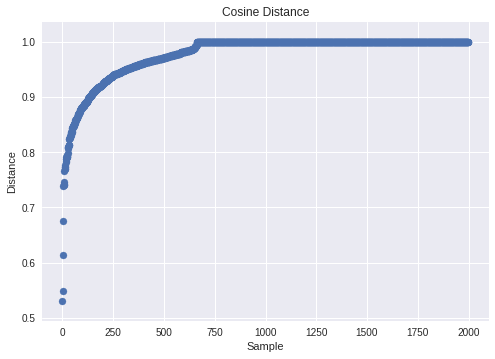

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

cos_val = cosine_similarity(tfidf_rank, qv, dense_output=True)
cos_val = sorted([1-a for b in cos_val for a in b])
arr1 = [x for x in range(len(cos_val))]

plt.title("Cosine Distance")
plt.ylabel("Distance")
plt.xlabel("Sample")
plt.scatter(
  arr1,
  cos_val
  
)
plt.show()


In [66]:
neighbors = NearestNeighbors(metric='cosine', n_neighbors = 50).fit(tfidf_rank)

five_neighbors_dist, five_neighbors_indices = neighbors.kneighbors(qv)

similar = pd.Series(five_neighbors_indices.flatten()).map(X.reset_index()['text'])
result = pd.DataFrame({'distance': five_neighbors_dist.flatten(), 'text': similar})
pd.set_option('display.max_colwidth', -1)
print(result)


    distance  \
0   0.530802   
1   0.547648   
2   0.613600   
3   0.675485   
4   0.739337   
5   0.739907   
6   0.740694   
7   0.742725   
8   0.745510   
9   0.766713   
10  0.769033   
11  0.769770   
12  0.772773   
13  0.773794   
14  0.776493   
15  0.782481   
16  0.783205   
17  0.786833   
18  0.788063   
19  0.790472   
20  0.791276   
21  0.791935   
22  0.791943   
23  0.792307   
24  0.795125   
25  0.798086   
26  0.807233   
27  0.807904   
28  0.808585   
29  0.809096   
30  0.812670   
31  0.813278   
32  0.813843   
33  0.823257   
34  0.823660   
35  0.825383   
36  0.826724   
37  0.827006   
38  0.828000   
39  0.830200   
40  0.830675   
41  0.831687   
42  0.835495   
43  0.835684   
44  0.836200   
45  0.836726   
46  0.837225   
47  0.839500   
48  0.843191   
49  0.844731   

                                                                                                                                                                                       

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

alldatavector_fit = vectorizer.fit(allwords.tolist())
alldatavector_transform = alldatavector_fit.transform(allwords.tolist())

xtrain, xtest, ytrain, ytest = train_test_split(alldatavector_transform, y, test_size=0.1, random_state=47)

clf = LogisticRegression(solver='liblinear').fit(xtrain, ytrain)
train_prediction = clf.predict(xtrain)
train_prob = clf.predict_proba(xtrain)
train_score = clf.score(xtrain, ytrain)

test_prediction = clf.predict(xtest)
test_probs = clf.predict_proba(xtest)
test_score = clf.score(xtest, ytest)

print(f'Train Accuracy: {train_score:.4}')
print(f'Test Accuracy: {test_score:.4}')

Train Accuracy: 0.9994
Test Accuracy: 0.93


In [0]:
probs_pos = train_prob[ytrain == 5][:, 1]
probs_neg = train_prob[ytrain == 1][:, 1]

n, bins, patches = plt.hist([probs_pos, probs_neg], 50, histtype='stepfilled', alpha=0.75, label=['positive', 'negative'])
plt.xlabel('predicted score')
plt.ylabel('count of prediction')
plt.title('histogram of predicted scores')
plt.legend(loc='upper center')
plt.xlim([0,1])
plt.grid(True)
plt.tight_layout()
plt.savefig('probs.png', dpi='figure')
plt.clf()

<Figure size 576x396 with 0 Axes>

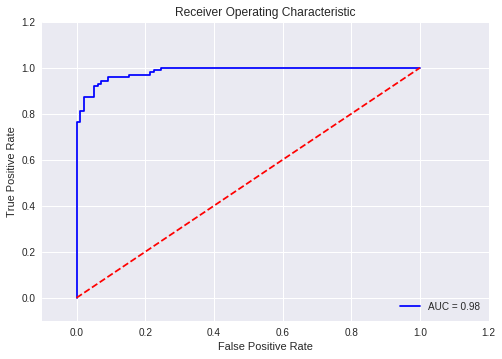

10
0.09196828354838768
0.09196828354838768
0.9313725490196079
0.061224489795918366
0.552061418312872


In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import math

clf = LogisticRegression(solver='liblinear').fit(xtrain, ytrain)
train_prediction = clf.predict(xtrain)
test_prediction = clf.predict(xtest)
test_probs = clf.predict_proba(xtest)

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, test_probs[:, 1], pos_label=5)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

dis = [];
min_val = 1;
serial = 0;
for idx in range(len(false_positive_rate)):
  p = math.sqrt((1 - true_positive_rate[idx]) ** 2 + (false_positive_rate[idx]) ** 2)
  dis.append(p)
  if min_val > p:
    min_val = p
    serial = idx

print(serial)
print(min_val)
print(min(dis))
print(true_positive_rate[serial])
print(false_positive_rate[serial])
print(thresholds[serial])



In [0]:
from sklearn import metrics

threshold_selected = thresholds[serial]
preds = np.where(train_prob[:, 1] > 0.55, 5, 1)

count = 0
test_y = ytrain.tolist()
for i in range(200):
  if preds[i] == test_y[i]:
    count = count +1

print(count/200)
print(count)




1.0
200
